In [1]:
%pip install torch 
%pip install PIL
%pip install facenet-pytorch
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 27.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 36.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 28.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 21.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━

In [3]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image

# Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True)

# Load pre-trained FaceNet model
resnet = InceptionResnetV1(pretrained='casia-webface').eval()

# Load an image containing faces
img = Image.open('../../../../../cds-vis-data/newspapers/GDL/GDL-1798-02-05-a-p0001.jpg') #0 faces
img_2 = Image.open('../../../../../cds-vis-data/newspapers/GDL/GDL-1987-08-21-a-p0012.jpg') #1 face 
img_3 =  Image.open('../../../../../cds-vis-data/newspapers/GDL/GDL-1997-08-09-a-p0021.jpg') #4 faces


# Detect faces in the image
boxes, _ = mtcnn.detect(img)

  0%|          | 0.00/111M [00:00<?, ?B/s]

In [4]:
print(boxes)

None


In [5]:

#img_2 contains 1 face and returns 1 list with 1 of 4 numbers: [[594.2079467773438 1372.92529296875 678.6680908203125 1482.1539306640625]]
#img_3 contains 4 faces and return 1 list with 4 list 

#to get the number of faces access the first element in boxes
boxes.shape[0]

AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
#test, getting all the deaces %, works

import os
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt


# Define folder path
folderpath = "../newspapers_2/"

# Initialize dictionaries to store results:
faces_rawcount_per_decade = {}  # Store raw counts of images with faces per decade for each newspaper
perc_pages_with_faces_per_decade = {}  # Store percentage of pages with faces per decade for each newspaper
pages_per_decade = {}


# Function to extract decade from filename:
def extract_decade(filename):
    parts = filename.split("-")
    year = int(parts[1])
    decade = (year // 10) * 10
    return decade


def get_num_faces(file_path):
    mtcnn = MTCNN(keep_all=True)    
    resnet = InceptionResnetV1(pretrained='casia-webface').eval()
    img = Image.open(file_path)
    boxes, _ = mtcnn.detect(img)
    if boxes is not None:
        num_faces = boxes.shape[0]  # Count the number of detected faces
    else:
        num_faces = 0  # No faces detected
    return num_faces



# Iterate through each subfolder (newspaper) in folderpath:
for newspaper_folder in sorted(os.listdir(folderpath)):

    # Construct the path to the newspaper we are looping through 
    full_path = os.path.join(folderpath, newspaper_folder)

    # Check if the path full_path exist as a directory
    if os.path.isdir(full_path):

        # Extract the name of the newspaper from the folder path
        newspaper_name = newspaper_folder

        # Initialize dictionaries for the current newspaper
        pages_per_decade[newspaper_name] = {}
        faces_rawcount_per_decade[newspaper_name] = {}
        perc_pages_with_faces_per_decade[newspaper_name] = {}

        # Initialize counter for pages with faces for the current decade
        pages_with_faces = 0 #this is for every newpaper

        # Iterate through each file in the subfolder (newspaper):
        for filename in sorted(os.listdir(full_path)):

            # Construct the full file path
            file_path = os.path.join(full_path, filename)
            print(file_path)

            # Check if the current item is a file and ends with ".jpg"
            if os.path.isfile(file_path) and filename.endswith(".jpg"):
                
                # Extract the decade from the filename
                decade = extract_decade(filename)
                
                # Increment the count of pages for the current decade
                if decade not in pages_per_decade[newspaper_name]:
                    pages_per_decade[newspaper_name][decade] = 1
                else:
                    pages_per_decade[newspaper_name][decade] += 1

                #get number of faces
                num_faces = get_num_faces(file_path)

                # Increment the counter if at least one face is detected on this page
                if num_faces > 0:
                    pages_with_faces += 1 #add to counter for that newspaper 


                # Update the count of faces for the current decade
                if decade not in faces_rawcount_per_decade[newspaper_folder]:
                    faces_rawcount_per_decade[newspaper_name][decade] = num_faces
                else:
                    faces_rawcount_per_decade[newspaper_name][decade] += num_faces

                #Update the % for the current decade
                if decade not in perc_pages_with_faces_per_decade[newspaper_name]:
                    perc_pages_with_faces_per_decade[newspaper_name][decade] = (pages_with_faces/pages_per_decade[newspaper_name][decade])*100
                else:
                    perc_pages_with_faces_per_decade[newspaper_name][decade] = (pages_with_faces/pages_per_decade[newspaper_name][decade])*100


                
    # Create DataFrame from perc_pages_with_faces_per_decade
    df = pd.DataFrame.from_dict(perc_pages_with_faces_per_decade[newspaper_name], orient='index', columns=['Percentage'])

    # Create DataFrame from faces_rawcount_per_decade
    df_2 = pd.DataFrame.from_dict(faces_rawcount_per_decade[newspaper_name], orient='index', columns=['count'])

    # Merge the two dataframes by index
    done = pd.merge(df, df_2, left_index=True, right_index=True)
    done['newspaper'] = newspaper_name

    # Save the dataframe to CSV
    done.to_csv(f'../out/{newspaper_name}_data.csv')


../newspapers_2/GDL/GDL-1798-02-05-a-p0001.jpg


100.0%


../newspapers_2/GDL/GDL-1798-02-05-a-p0002.jpg
../newspapers_2/GDL/GDL-1798-02-05-a-p0003.jpg
../newspapers_2/GDL/GDL-1798-02-05-a-p0004.jpg
../newspapers_2/GDL/GDL-1997-08-09-a-p0029.jpg
../newspapers_2/GDL/GDL-1997-08-09-a-p0030.jpg
../newspapers_2/GDL/GDL-1997-08-09-a-p0031.jpg
../newspapers_2/GDL/GDL-1997-08-09-a-p0032.jpg
../newspapers_2/IMP/IMP-1882-05-04-a-p0001.jpg
../newspapers_2/IMP/IMP-1882-05-04-a-p0002.jpg
../newspapers_2/IMP/IMP-1882-05-04-a-p0003.jpg
../newspapers_2/IMP/IMP-1882-05-04-a-p0004.jpg
../newspapers_2/IMP/IMP-2017-12-30-a-p0025.jpg
../newspapers_2/IMP/IMP-2017-12-30-a-p0026.jpg
../newspapers_2/IMP/IMP-2017-12-30-a-p0027.jpg
../newspapers_2/IMP/IMP-2017-12-30-a-p0028.jpg
../newspapers_2/JDG/JDG-1826-02-16-a-p0001.jpg
../newspapers_2/JDG/JDG-1826-02-16-a-p0002.jpg
../newspapers_2/JDG/JDG-1826-02-16-a-p0003.jpg
../newspapers_2/JDG/JDG-1826-02-16-a-p0004.jpg
../newspapers_2/JDG/JDG-1998-02-27-a-p0041.jpg
../newspapers_2/JDG/JDG-1998-02-27-a-p0042.jpg
../newspapers

In [3]:
%pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
#test, with tqdm
import os
from tqdm import tqdm  # Import tqdm
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Define folder path
folderpath = "../newspapers_2/"

# Initialize dictionaries to store results:
faces_rawcount_per_decade = {}  # Store raw counts of images with faces per decade for each newspaper
perc_pages_with_faces_per_decade = {}  # Store percentage of pages with faces per decade for each newspaper
pages_per_decade = {}

# Function to extract decade from filename:
def extract_decade(filename):
    parts = filename.split("-")
    year = int(parts[1])
    decade = (year // 10) * 10
    return decade

def get_num_faces(file_path):
    mtcnn = MTCNN(keep_all=True)    
    resnet = InceptionResnetV1(pretrained='casia-webface').eval()
    img = Image.open(file_path)
    boxes, _ = mtcnn.detect(img)
    if boxes is not None:
        num_faces = boxes.shape[0]  # Count the number of detected faces
    else:
        num_faces = 0  # No faces detected
    return num_faces

# Iterate through each subfolder (newspaper) in folderpath:
for newspaper_folder in sorted(os.listdir(folderpath)):
    # Construct the path to the newspaper we are looping through 
    full_path = os.path.join(folderpath, newspaper_folder)

    # Check if the path full_path exist as a directory
    if os.path.isdir(full_path):
        # Extract the name of the newspaper from the folder path
        newspaper_name = newspaper_folder

        # Initialize dictionaries for the current newspaper
        pages_per_decade[newspaper_name] = {}
        faces_rawcount_per_decade[newspaper_name] = {}
        perc_pages_with_faces_per_decade[newspaper_name] = {}

        # Initialize counter for pages with faces for the current decade
        pages_with_faces = 0 #this is for every newpaper

        # Get list of files in the current newspaper folder
        files = sorted([filename for filename in os.listdir(full_path) if os.path.isfile(os.path.join(full_path, filename)) and filename.endswith(".jpg")])

        # Use tqdm for progress visualization
        for filename in tqdm(files, desc=newspaper_name):
            # Construct the full file path
            file_path = os.path.join(full_path, filename)

            # Extract the decade from the filename
            decade = extract_decade(filename)

            # Increment the count of pages for the current decade
            pages_per_decade[newspaper_name][decade] = pages_per_decade[newspaper_name].get(decade, 0) + 1

            # Get number of faces
            num_faces = get_num_faces(file_path)

            # Increment the counter if at least one face is detected on this page
            if num_faces > 0:
                pages_with_faces += 1

            # Update the count of faces for the current decade
            faces_rawcount_per_decade[newspaper_name][decade] = faces_rawcount_per_decade[newspaper_name].get(decade, 0) + num_faces

            # Update the percentage for the current decade
            perc_pages_with_faces_per_decade[newspaper_name][decade] = (pages_with_faces / pages_per_decade[newspaper_name][decade]) * 100

    # Create DataFrame from perc_pages_with_faces_per_decade
    df = pd.DataFrame.from_dict(perc_pages_with_faces_per_decade[newspaper_name], orient='index', columns=['Percentage'])

    # Create DataFrame from faces_rawcount_per_decade
    df_2 = pd.DataFrame.from_dict(faces_rawcount_per_decade[newspaper_name], orient='index', columns=['count'])

    # Merge the two dataframes by index
    done = pd.merge(df, df_2, left_index=True, right_index=True)
    done['newspaper'] = newspaper_name

    
    # Save the dataframe to CSV
    done.to_csv(f'../out/{newspaper_name}_data.csv')


GDL:   0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0.00/111M [00:00<?, ?B/s]

JDG: 100%|██████████| 8/8 [02:45<00:00, 20.72s/it]


to do:
- 1 problematic file (import to test folder)
- plot
- Rewrite to py
- Make run, setup, requirenments 
- Test on small dataset: if running
- Delete newsfolder_2, bigger machine, run on full 


In [5]:
import os
import pandas as pd

csv_files = [f for f in os.listdir("../out/") if f.endswith('.csv')]
print(csv_files)

dfs = []

for csv in csv_files:
    df = pd.read_csv(os.path.join("../out", csv))
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)
final_df


['IMP_data.csv', 'GDL_data.csv', 'JDG_data.csv']


,Unnamed: 0,Percentage,count,newspaper
0,1880,0.0,0,IMP
1,2010,75.0,11,IMP
2,1790,0.0,0,GDL
3,1990,25.0,1,GDL
4,1820,0.0,0,JDG
5,1990,50.0,2,JDG


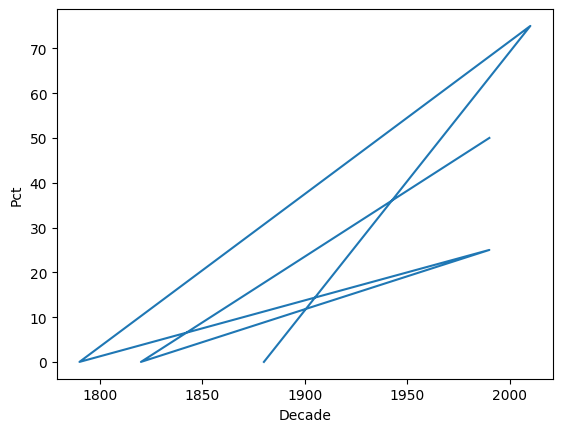

In [6]:
#plot

#plot all 3 by using the merged dataset, color 3 lines in different colors, 

#x = decade, y= percentage, titel= name of newspaper

#import csv


import matplotlib.pyplot as plt
import numpy as np

# Extract the date and close price columns
dates = final_df.iloc[:,0]
closing_price = final_df['Percentage']

# Create a line plot
plt.plot(dates, closing_price)
plt.xlabel("Decade")
plt.ylabel("Pct")


# Show the plot
plt.show()


#obs rotate x lables 45 d if needed

In [6]:
data

,Unnamed: 0,Percentage,count
0,1790,0.0,0
1,1990,25.0,1


In [11]:
data.iloc[:,0]

0    1790
1    1990
Name: Unnamed: 0, dtype: int64